# Informações adicionais

## Modelagem dos dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

In [2]:
dados = pd.read_csv('Anuário Estatístico 2019 - Evolução da produção de gás natural, por localização.csv', sep = ';', decimal = ',')

In [3]:
ba_onshore = dados.loc[(dados['UF'] == 'Bahia') & (dados['Localização'] == 'Terra')]
ba_offshore = dados.loc[(dados['UF'] == 'Bahia') & (dados['Localização'] == 'Mar')]
ba_total = dados.loc[dados['UF'] == 'Bahia']

In [4]:
def modelagem(n):
    n['Produção de gás natural (milhões m3)'] = n['Produção de gás natural (milhões m3)'].mul(1000000)
    n = n.rename(columns = {'Produção de gás natural (milhões m3)' : 'Produção de gás natural (m³)'})
    n = n.groupby(['Ano'])['Produção de gás natural (m³)'].sum().to_frame().reset_index()
    return n

ba_onshore = modelagem(ba_onshore)
ba_offshore = modelagem(ba_offshore)
ba_total = modelagem(ba_total)

In [5]:
def grafico(n):
    plt.figure(figsize = (10, 5))
    plt.xticks(n['Ano'])
    if n is ba_onshore:            
        sns.barplot(x = 'Ano', y = 'Produção de gás natural (m³)', color = 'brown', data = ba_onshore)
        plt.title('Produção de gás natural onshore no estado da Bahia', fontsize = 16, fontweight = 'bold')
    elif n is ba_offshore:
        sns.barplot(x = 'Ano', y = 'Produção de gás natural (m³)', color = 'blue', data = ba_offshore)
        plt.title('Produção de gás natural offshore no estado da Bahia', fontsize = 16, fontweight = 'bold')
    elif n is ba_total:
        sns.barplot(x = 'Ano', y = 'Produção de gás natural (m³)', color = 'black', data = ba_total)
        plt.title('Produção de gás natural total no estado da Bahia', fontsize = 16, fontweight = 'bold')
    plt.show()

In [6]:
ba_onshore_ts = copy.deepcopy(ba_onshore)
ba_offshore_ts = copy.deepcopy(ba_offshore)
ba_total_ts = copy.deepcopy(ba_total)

In [7]:
def time_series(time):
    time['Ano'] = pd.to_datetime(time['Ano'].astype(str), format = '%Y')
    time = time.set_index('Ano')
    return time

ba_onshore_ts = time_series(ba_onshore_ts) # [2, 0, 0]
ba_offshore_ts = time_series(ba_offshore_ts) # [1, 0, 0]
ba_total_ts = time_series(ba_total_ts) # [1, 0, 0]

In [8]:
#modelo_auto = auto_arima(ba_onshore_ts, m = 2, seasonal = False, trace = True)
#modelo_auto.summary()

In [9]:
modelo_ba_onshore = ARIMA(ba_onshore_ts, order = [2, 0, 0])
modelo_treinado_ba_onshore = modelo_ba_onshore.fit()

modelo_ba_offshore = ARIMA(ba_offshore_ts, order = [1, 0, 0])
modelo_treinado_ba_offshore = modelo_ba_offshore.fit()

modelo_ba_total = ARIMA(ba_total_ts, order = [1, 0, 0])
modelo_treinado_ba_total = modelo_ba_total.fit()

In [10]:
previsoes_onshore = modelo_treinado_ba_onshore.forecast(steps = 2)[0]
previsoes_offshore = modelo_treinado_ba_offshore.forecast(steps = 2)[0]
previsoes_total = modelo_treinado_ba_total.forecast(steps = 2)[0]

## Gráfico da produção de gás natural onshore e sua previsão

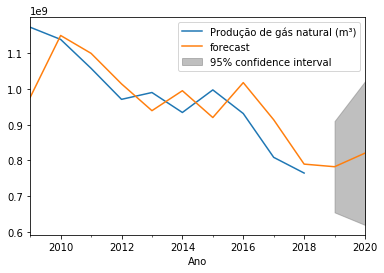

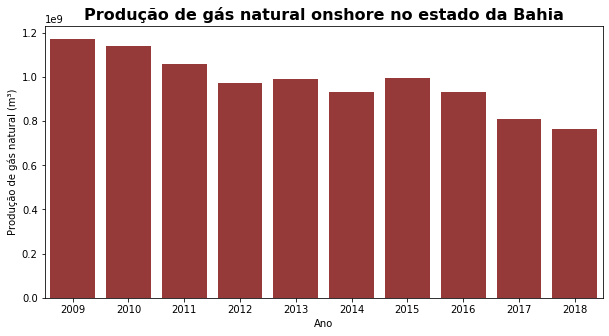

In [11]:
eixo_onshore = ba_onshore_ts.plot()

modelo_treinado_ba_onshore.plot_predict('2009-01-01', '2020-01-01', ax = eixo_onshore, plot_insample = False)
grafico(ba_onshore)

De acordo com ambos os gráficos, podemos perceber que a previsão de produção de gás natural onshore tende a ser positiva para os próximos 2 anos.

## Gráfico da produção de gás natural offshore e sua previsão

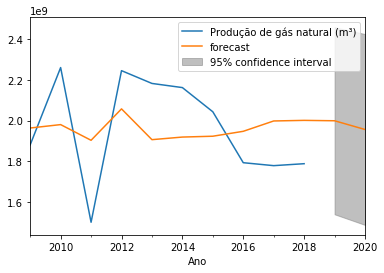

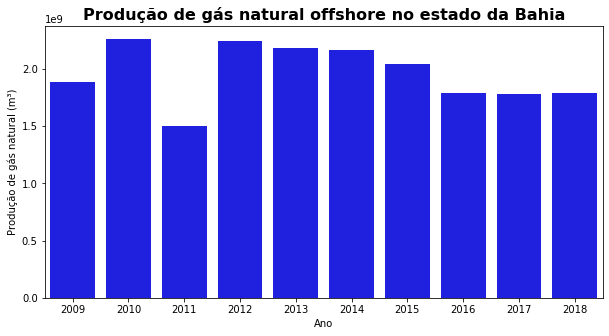

In [12]:
eixo_offshore = ba_offshore_ts.plot()

modelo_treinado_ba_offshore.plot_predict('2009-01-01', '2020-01-01', ax = eixo_offshore, plot_insample = False)
grafico(ba_offshore)

De acordo com ambos os gráficos, podemos perceber que a previsão de produção de gás natural offshore tende a ser positiva no primeiro ano, mas com uma leve queda no segundo ano.

## Gráfico da produção de gás natural total e sua previsão

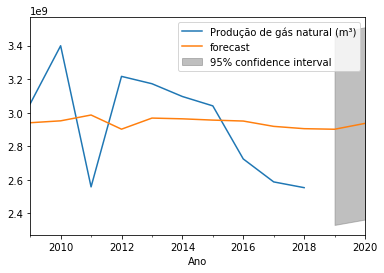

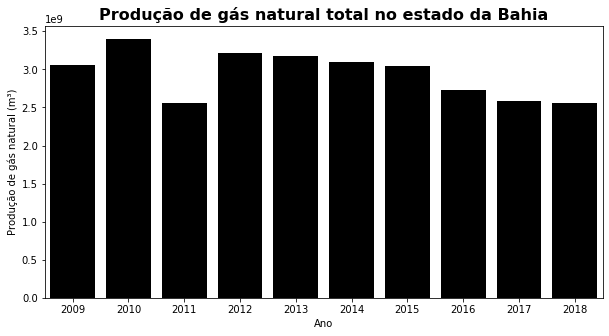

In [13]:
eixo_total = ba_total_ts.plot()
modelo_treinado_ba_total.plot_predict('2009-01-01', '2020-01-01', ax = eixo_total, plot_insample = False)
grafico(ba_total)

De acordo com ambos os gráficos, podemos perceber que a previsão de produção de gás natural offshore tende a ser positiva no primeiro ano e seguindo com uma leve alta no segundo ano.